# CS541 HW3
# Chenxu Wang
# 10457625

In [2]:
import numpy as np
import random
from numpy import linalg as LA
import matplotlib.pyplot as plt

# Consider n = 100 and d = 40.

In [3]:
n = 100
d = 40

# Generate Matrix X: nxd, and response y: nx1

In [4]:
# define a function to generate X, y, and w.
# Input:
# X: nxd
# y: nx1
# w: dx1
# Output:
# X: nx(d+1), all values of last column are 1
# y: nx1
# w: (d+1)x1
def generate_data(n, d):
    # Generate X
    np.random.seed(0)
    X=np.random.randn(n,d) # nxd
    #print(X.shape)
    
    
    # Generate parameter w: (d+1)x1
    random.seed(0)
    w=np.array([random.randrange(2,30,1) for x in range(d+1)])
    #print(param.shape)
    
    # Add an extra x=1 column for row vector Xi(1xd)
    col_1=np.array([[1] for x in range(n)])
    X = np.append(X,col_1,axis=1) # nx(d+1)
    
    
    # Generate the random error(nx1) for X
    error_level = 10
    err = np.random.randn(n) * error_level # nx1
    #print(err.shape)
    # Obtain the response y by y=Xw + error
    y = np.dot(X,w)
    y = y + err # nx1
    y = y.reshape(n,1)
    w = w.reshape(d+1,1)
    return X,y,w

In [5]:
X, y, w = generate_data(n,d)
print(X.shape)
print(y.shape)
print(w.shape)


(100, 41)
(100, 1)
(41, 1)


# Calculate the exact solution $w^{_{*}} = \left ( X^{T} X\right )^{-1}X^{T}y$

In [6]:
# Difine a function to calculate exact solution w*
def calculate_w_opt(X, y):
    X = np.asmatrix(X)
    tmp = X.T.dot(X).I.dot(X.T)
    w_opt = tmp.dot(y)
    return w_opt 

In [7]:
w_opt = calculate_w_opt(X,y)
print(w_opt)


[[29.13609639]
 [13.8831196 ]
 [23.90748762]
 [15.65837088]
 [ 3.24212203]
 [ 9.37811779]
 [19.24877864]
 [18.1937358 ]
 [17.23837642]
 [27.61441905]
 [27.23604776]
 [13.07630422]
 [15.97861962]
 [13.6634685 ]
 [18.87309824]
 [ 5.79509821]
 [16.81365681]
 [ 6.84992721]
 [12.76833177]
 [ 4.87997583]
 [26.11020676]
 [ 5.44340128]
 [23.32026126]
 [26.49321354]
 [ 8.68762782]
 [17.78431028]
 [24.58837841]
 [27.00294918]
 [20.97962126]
 [ 6.38491489]
 [10.42363893]
 [ 4.2657438 ]
 [26.25678502]
 [ 2.01761249]
 [30.16546297]
 [22.15636718]
 [13.77829694]
 [17.39337387]
 [17.61386242]
 [ 5.57284735]
 [11.99933347]]


In [8]:
print(w)

[[29]
 [14]
 [26]
 [15]
 [ 3]
 [10]
 [18]
 [17]
 [14]
 [27]
 [28]
 [11]
 [17]
 [13]
 [20]
 [ 8]
 [18]
 [ 6]
 [11]
 [ 6]
 [26]
 [ 5]
 [21]
 [27]
 [10]
 [19]
 [24]
 [27]
 [21]
 [ 6]
 [11]
 [ 5]
 [25]
 [ 4]
 [29]
 [23]
 [12]
 [17]
 [19]
 [ 5]
 [13]]


# Calculate the minimum and maximum eigenvalue of the Hessian matrix, and derive the upper bound on the learning rate $\eta $ in gradient descent.

In [9]:
H = X.T.dot(X)
#print(H.shape)
eigenVal, eigenVec = LA.eig(H)

In [10]:
print(eigenVal.shape)
print(eigenVec.shape)

(41,)
(41, 41)


In [11]:
eigenVal.sort()

In [12]:
eigenVal

array([ 11.56042907,  15.61653163,  16.95125676,  23.12965993,
        27.14136375,  29.90352821,  33.14345237,  34.30656576,
        34.76175589,  41.93060169,  47.15720366,  50.87660981,
        52.04029865,  56.50154343,  58.55009029,  65.58743738,
        68.56376602,  69.93495064,  75.01019269,  83.50319835,
        84.39915841,  87.48836045,  89.98728921, 102.67389926,
       104.54000111, 110.2814098 , 115.65205001, 118.14736355,
       124.87521243, 134.25222527, 135.2918731 , 137.78525741,
       154.00568673, 161.99541243, 168.60321975, 177.04486622,
       180.54984383, 190.25681725, 212.17006893, 221.19890374,
       251.63084904])

In [13]:
max_eigenVal = eigenVal[-1]
min_eigenVal = eigenVal[0]
print(max_eigenVal)
print(min_eigenVal)

251.63084904376393
11.560429068410226


# Derive the upper bound on the learning rate $\eta $ in gradient descent

In [14]:
# The upper bound on the learning rate lr in gradient descent
upper_bound = (max_eigenVal-min_eigenVal)/(max_eigenVal+min_eigenVal)
print(upper_bound)
# The theoretical bound lr0:
lr0 = 2/(max_eigenVal + min_eigenVal)
print(lr0)

0.9121518832133709
0.007599036010409071


# Run Gradient Descent on the data set with 6 choices of learning rate:$\eta \in \left \{ 0.01\eta _{0}, 0.1\eta _{0}, \eta _{0}, 2\eta _{0}, 20\eta _{0}, 100\eta _{0}\right \}$

In [15]:
# Define a function to implement Gradient Descent
# Input:
# X :nx(d+1)
# y: nx1
# w0: (d+1)x1
# lr: learning rate
# t: the number of iteration
# Output:
# w_list: a list of w for every iteration
def Gradient_Descent(X, y, w0, lr, t):
    w_list = []
    wt = w0
    for i in range(t):
        gradient = X.T.dot(X).dot(wt) - X.T.dot(y)
        wt = wt - lr*gradient
        w_list.append(wt)
    return w_list

In [16]:
# Define a function to calculate ||Wt - W*||
# Input:
# w_list: a list of wt
# w_opt: W*
def norm2_Wt_W_opt(w_list, w_opt):
    norm_list = []
    for i in range(len(w_list)):
        norm = np.linalg.norm(w_list[i]-w_opt, ord=2)
        norm_list.append(norm)
    return norm_list

In [17]:
# Plot the curves for 6 learning Rates
w0 = np.array([[0] for x in range(d+1)])
#lr0 = 0.001
t = 100
lr_list = [0.01*lr0, 0.1*lr0, lr0, 2*lr0, 20*lr0, 100*lr0]
w_list0 = Gradient_Descent(X, y, w0, lr_list[0], t)
w_list1 = Gradient_Descent(X, y, w0, lr_list[1], t)
w_list2 = Gradient_Descent(X, y, w0, lr_list[2], t)
w_list3 = Gradient_Descent(X, y, w0, lr_list[3], t)
w_list4 = Gradient_Descent(X, y, w0, lr_list[4], t)
w_list5 = Gradient_Descent(X, y, w0, lr_list[5], t)

norm2_0 = norm2_Wt_W_opt(w_list0, w_opt)
norm2_1 = norm2_Wt_W_opt(w_list1, w_opt)
norm2_2 = norm2_Wt_W_opt(w_list2, w_opt)
norm2_3 = norm2_Wt_W_opt(w_list3, w_opt)
norm2_4 = norm2_Wt_W_opt(w_list4, w_opt)
norm2_5 = norm2_Wt_W_opt(w_list5, w_opt)

# Plot the curve of $\left \| w^{t} -w^{*}\right \|_{2}  v.s.   t$  for $1\leq t\leq 100$

/Users/wangchenxu/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
/Users/wangchenxu/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/wangchenxu/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


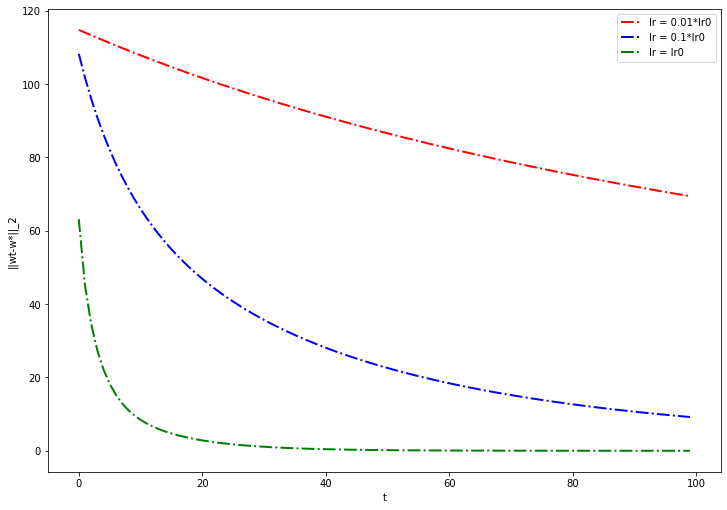

In [18]:
fig = plt.figure(figsize=(10, 7))
plt.plot(range(100), norm2_0, '-.r', LineWidth=2,label='lr = 0.01*lr0')
plt.plot(range(100), norm2_1, '-.b', LineWidth=2,label='lr = 0.1*lr0')
plt.plot(range(100), norm2_2, '-.g', LineWidth=2,label='lr = lr0')
#plt.plot(range(100), norm2_3, '-.c', LineWidth=2,label='lr = 2*lr0')
#plt.plot(range(100), norm2_4, '-.m', LineWidth=2,label='lr = 20*lr0')
#plt.plot(range(100), norm2_5, '-.y', LineWidth=2,label='lr = 100*lr0')

plt.legend()
plt.tight_layout()
plt.xlabel("t")
plt.ylabel('||wt-w*||_2')
plt.show()

/Users/wangchenxu/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
/Users/wangchenxu/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/wangchenxu/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


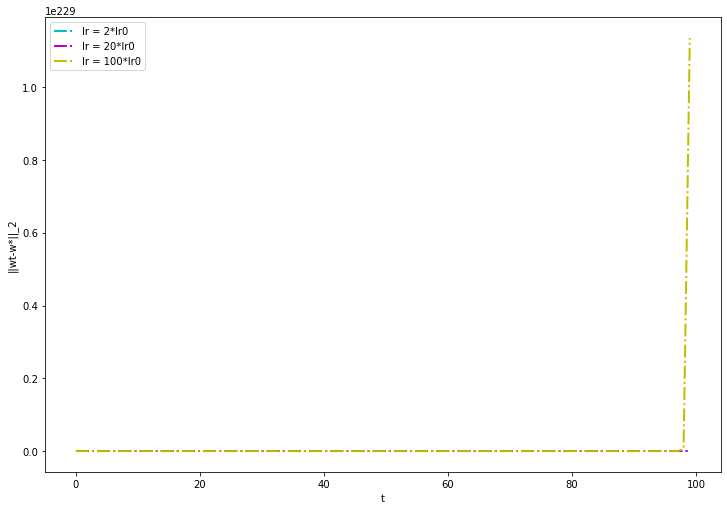

In [19]:
fig = plt.figure(figsize=(10, 7))
plt.plot(range(100), norm2_3, '-.c', LineWidth=2,label='lr = 2*lr0')
plt.plot(range(100), norm2_4, '-.m', LineWidth=2,label='lr = 20*lr0')
plt.plot(range(100), norm2_5, '-.y', LineWidth=2,label='lr = 100*lr0')

plt.legend()
plt.tight_layout()
plt.xlabel("t")
plt.ylabel('||wt-w*||_2')
plt.show()

If learning rate is too large, the gradient descent may not converge. On the other hand, 
if learning rate is too small, the gradient descent wil converge slowly.
As the result in the plot, when lr = lr0, the GD can converage fast and use a few iterations. 
When lr = 0.01*lr0, the converagence cannot be reached in the 100 iterations. 
The model is strongly convex since ||wt-w*|| -->0.
(Note that the last 3 curves cannot display in the same plot with the first curves since the norm2 of 
the last 3 curves will be very large. So, I display the last 3 curves respectively)

# Consider n = 100 and d = 200, and generate X and y.

In [20]:
nn = 100
dd = 200

In [21]:
XX, yy, ww = generate_data(nn,dd)
print(XX.shape)
print(yy.shape)
print(ww.shape)

(100, 201)
(100, 1)
(201, 1)


In [22]:
ww

array([[29],
       [14],
       [26],
       [15],
       [ 3],
       [10],
       [18],
       [17],
       [14],
       [27],
       [28],
       [11],
       [17],
       [13],
       [20],
       [ 8],
       [18],
       [ 6],
       [11],
       [ 6],
       [26],
       [ 5],
       [21],
       [27],
       [10],
       [19],
       [24],
       [27],
       [21],
       [ 6],
       [11],
       [ 5],
       [25],
       [ 4],
       [29],
       [23],
       [12],
       [17],
       [19],
       [ 5],
       [13],
       [15],
       [12],
       [21],
       [22],
       [ 8],
       [19],
       [17],
       [16],
       [29],
       [18],
       [10],
       [ 3],
       [27],
       [19],
       [ 2],
       [ 4],
       [25],
       [28],
       [14],
       [24],
       [28],
       [27],
       [23],
       [22],
       [ 2],
       [21],
       [17],
       [28],
       [29],
       [12],
       [ 9],
       [25],
       [12],
       [24],
       [29],
       [ 4],

In [23]:
# Trying to calculate w*
ww_opt = calculate_w_opt(XX,yy)
print(ww_opt)

[[ 7.17748969e+03]
 [ 1.26735395e+04]
 [-6.03724785e+03]
 [-2.09982804e+04]
 [-3.72391456e+03]
 [-1.28914319e+04]
 [ 1.62385494e+04]
 [ 1.79324938e+04]
 [ 9.68327385e+01]
 [ 3.22773290e+04]
 [ 1.50241041e+04]
 [ 1.65366552e+04]
 [-9.85274387e+03]
 [ 1.16065800e+04]
 [ 4.36334601e+04]
 [-3.54846807e+03]
 [-4.43720969e+03]
 [ 1.42124308e+04]
 [ 1.79398908e+04]
 [ 5.92047595e+03]
 [-1.91417445e+04]
 [-1.22625096e+04]
 [-2.03969164e+03]
 [-8.54374171e+03]
 [-1.46215117e+04]
 [ 2.42294422e+04]
 [-7.15620146e+03]
 [-3.21505971e+03]
 [-9.61889021e+03]
 [ 8.03304450e+03]
 [ 4.84180528e+04]
 [-7.82801782e+03]
 [-6.51599110e+03]
 [-7.34078063e+03]
 [-1.48468464e+04]
 [-1.67919158e+04]
 [-3.57770610e+04]
 [ 2.72402881e+04]
 [ 6.36296109e+04]
 [-1.68821827e+04]
 [-6.50929569e+03]
 [ 1.69844906e+04]
 [-3.15922185e+04]
 [ 3.40380231e+03]
 [ 5.03617760e+04]
 [-2.18805756e+04]
 [-5.92388658e+02]
 [ 3.06368199e+04]
 [-1.94889004e+04]
 [ 7.28139434e+03]
 [ 2.43639632e+03]
 [ 6.87105885e+03]
 [ 6.3508839

There is big difference between w* and the real w. 
When the number of w is large than the number of samples. X.T*X is not invertible.
Therefore, the result will not be calcuated correctly by directly calculating the formulation of w*.

In [24]:
HH = XX.T.dot(XX)
#print(H.shape)
eigenVall, eigenVecc = LA.eig(HH)

In [25]:
print(eigenVall.shape)
print(eigenVecc.shape)

(201,)
(201, 201)


In [28]:
eigenVall.sort()

In [32]:
#eigenVall
max_eigenVall = eigenVall[-1]
min_eigenVall = eigenVall[0]
print(max_eigenVall)
print(min_eigenVall)

(549.9256704324822+0j)
(-1.0278628316152719e-13-2.0344552919422622e-14j)


In [33]:
# The theoretical bound lr0:
lrr0 = 2/(max_eigenVall + min_eigenVall)
print(lrr0)

(0.0036368551379445976+1.3454580462846784e-19j)


In [39]:
ww0 = np.array([[0] for x in range(dd+1)])
lrr0 = 0.0036
t = 100
lr_list = [0.01*lrr0, 0.1*lrr0, lrr0, 2*lrr0, 20*lrr0, 100*lrr0]
ww_list0 = Gradient_Descent(XX, yy, ww0, lr_list[0], t)
ww_list1 = Gradient_Descent(XX, yy, ww0, lr_list[1], t)
ww_list2 = Gradient_Descent(XX, yy, ww0, lr_list[2], t)
ww_list3 = Gradient_Descent(XX, yy, ww0, lr_list[3], t)
ww_list4 = Gradient_Descent(XX, yy, ww0, lr_list[4], t)
ww_list5 = Gradient_Descent(XX, yy, ww0, lr_list[5], t)

In [40]:
#ww_list0[-2]

In [41]:

# Define a function to calculate F(wt) = 1/2||y - XW||**2
# Input:
# w_list: a list of wt
# X
# y
def F_wt(w_list, X, y):
    Fw_list = []
    for i in range(len(w_list)):
        fw =0.5*pow(np.linalg.norm(y- X.dot(w_list[i]), ord=2), 2)
        Fw_list.append(fw)
    return Fw_list

In [42]:
Fw_list0 = F_wt(ww_list0, XX, yy)
Fw_list1 = F_wt(ww_list1, XX, yy)
Fw_list2 = F_wt(ww_list2, XX, yy)
Fw_list3 = F_wt(ww_list3, XX, yy)
Fw_list4 = F_wt(ww_list4, XX, yy)
Fw_list5 = F_wt(ww_list5, XX, yy)

/Users/wangchenxu/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in double_scalars
  if __name__ == '__main__':


/Users/wangchenxu/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
/Users/wangchenxu/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/wangchenxu/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


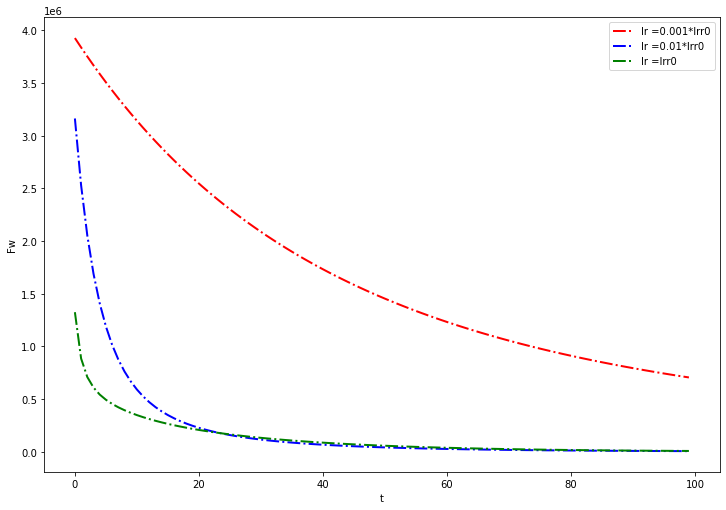

In [43]:
fig = plt.figure(figsize=(10, 7))
plt.plot(range(100), Fw_list0, '-.r', LineWidth=2,label='lr =0.001*lrr0')
plt.plot(range(100), Fw_list1, '-.b', LineWidth=2,label='lr =0.01*lrr0')
plt.plot(range(100), Fw_list2, '-.g', LineWidth=2,label='lr =lrr0')
#plt.plot(range(100), Fw_list3, '-.c', LineWidth=2,label='lr =2*lrr0')
#plt.plot(range(100), Fw_list4, '-.m', LineWidth=2,label='lr =20*lrr0')
#plt.plot(range(100), Fw_list5, '-.y', LineWidth=2,label='lr =100*lrr0')


plt.legend()
plt.tight_layout()
plt.xlabel("t")
plt.ylabel('Fw')
plt.show()

There are many lines which come to convergence. When choosing lrr0 = 0.0036, we find that the curve(lrr = lrr0) will perform best. It can converage fast and use fewer iterations. Therefore, for the condition(n = 100, d = 200), we can apply GD. 

/Users/wangchenxu/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  
/Users/wangchenxu/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/wangchenxu/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  after removing the cwd from sys.path.


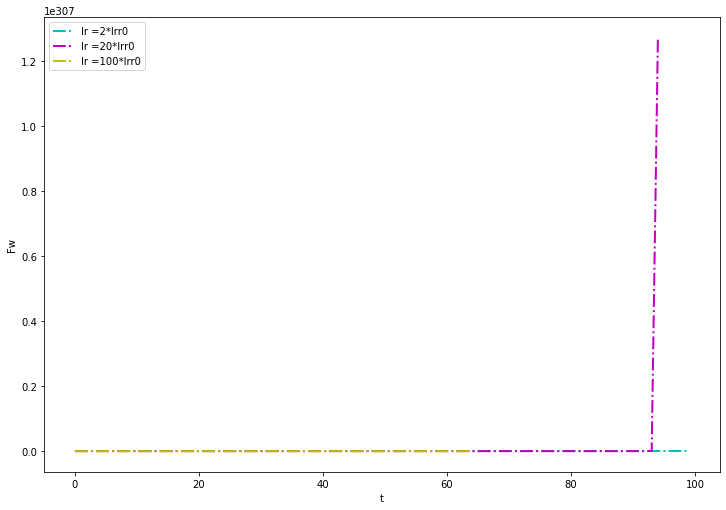

In [44]:
fig = plt.figure(figsize=(10, 7))
plt.plot(range(100), Fw_list3, '-.c', LineWidth=2,label='lr =2*lrr0')
plt.plot(range(100), Fw_list4, '-.m', LineWidth=2,label='lr =20*lrr0')
plt.plot(range(100), Fw_list5, '-.y', LineWidth=2,label='lr =100*lrr0')

plt.legend()
plt.tight_layout()
plt.xlabel("t")
plt.ylabel('Fw')
plt.show()